# About the dataset
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data.These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing important libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data 

In [3]:
df = pd.read_csv("./us-accidents/US_Accidents_Dec21_updated.csv")

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# checking size of dataset
print('\n'f'The dataset comprises : \n * {df.shape[0]} rows and \n * {df.shape[1]} columns''\n')


The dataset comprises : 
 * 2845342 rows and 
 * 47 columns



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

- From the info above, "Start Time" along with "End Time" have wrong data types. 

In [8]:
df.Timezone

0          US/Eastern
1          US/Eastern
2          US/Eastern
3          US/Eastern
4          US/Eastern
              ...    
2845337    US/Pacific
2845338    US/Pacific
2845339    US/Pacific
2845340    US/Pacific
2845341    US/Pacific
Name: Timezone, Length: 2845342, dtype: object

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [10]:
#counting our numeric columns 
numerics =["int16", "int32", "int64", 'float16', "float32", "float64"]
num_df =df.select_dtypes(include=numerics)
len(num_df.columns)

14

*There are 14 numerical columns in this dataset. There seem to be unequal counts for these data points which can infer to presence of missing values.
Now , let's check for the missing values .

#### Percentage of missing values

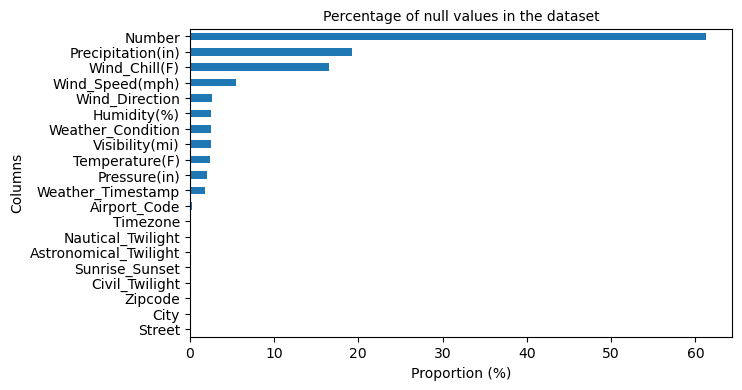

In [11]:
plt.figure(figsize=(7,4))
p_of_missing= df.isna().sum().sort_values(ascending=True)/ len(df) * 100
p_of_missing[p_of_missing != 0].plot(kind="barh") #filtered out columns whose percentages of missing values equals 0
plt.title("Percentage of null values in the dataset",size=10,color="black")
plt.xlabel('Proportion (%)')
plt.ylabel('Columns');

-From the chart above, we can see that "Number" column has the highest record of missing values  ~60% . Columns of ["Precipitation" , "Wind_Chill", "Wind_Speed" , "Wind Direction" , "Humidity", "Weather Condition", "Visibility"] and so on also have missing values in their columns .

#### Quality issues with the dataset 

- The "Number" column has about 60% of null values along with other columns. 
- Some columns like "Start Time" and "End Time" have wrong data types.

# Data cleaning and preprocessing 

In [12]:
df = df.drop(columns=["Number"])
#dropping only the Number column because it contains ~60% of missing values . 

In [13]:
#changing the time to correct data type
df["Start_Time"]=pd.to_datetime(df.Start_Time)

#to check
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

# Exploratory Data Analysis 

##### Questions to guide us :
- How many states are in the dataset?
- How many cities are in the dataset ?
- What are the cities with top accident cases ?
- How are the cities with least number of accidents ?
- Which states had frequent accident cases ?
- Which streets are prone to accidents ?
- What time of the day had the highest record of accidents?
- What day of the week did most accidents occur ?
- Which month has highest record of accidents ?
- What is the yearly trend of accident records?


#### Univariate Analysis 

In [14]:
df1= df.copy() #making a copy of original dataset
states=df1["State"].unique()
print(len(states))

49


- The dataset contains 49 states out of 50 

In [15]:
cities=df1["City"].unique()
print(len(cities))

11682


- This dataset contains records of 11682 cities in United States of America out of [19,495 cities](https://worldpopulationreview.com/us-city-rankings/how-many-cities-are-in-the-us)

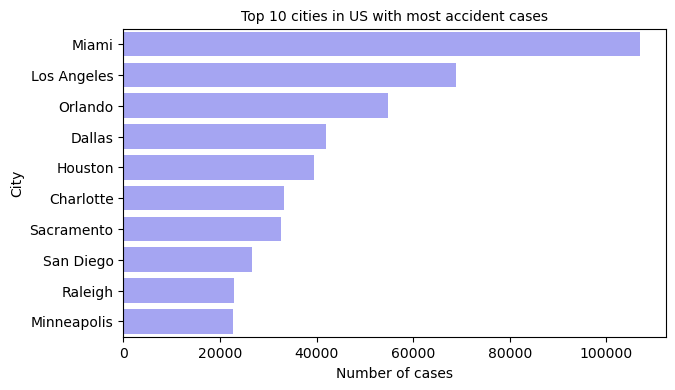

In [16]:
# Let's get the top cities by acident records 
plt.figure(figsize=(7,4))
sns.barplot(x=df1["City"].value_counts().head(10), y= df1["City"].value_counts().head(10).index,color="b", alpha=0.4)
plt.title("Top 10 cities in US with most accident cases",size=10,color="black")
plt.ylabel('City')
plt.xlabel('Number of cases');

- The chart above shows the top 10 countries with highest records of accidents . 
- Miami has the highest record of over 100K . Followed by Los Angeles and Orlando
- New York,the [most populated](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population) city in USA is not among top 10 . 

In [17]:
print("New York" in df1.City.unique())

True


In [18]:
ny = df1[df1["City"]=="New York"]
len(ny)

7068

- There are 7068 acident cases in New York. 
- Now let's check for cities with low counts of accidents 

#### Top 5 cities with lowest count of accidents

In [19]:
city_acc= df1["City"].value_counts()
min_acc=city_acc[city_acc<1000]
min_acc.tail()

Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, dtype: int64

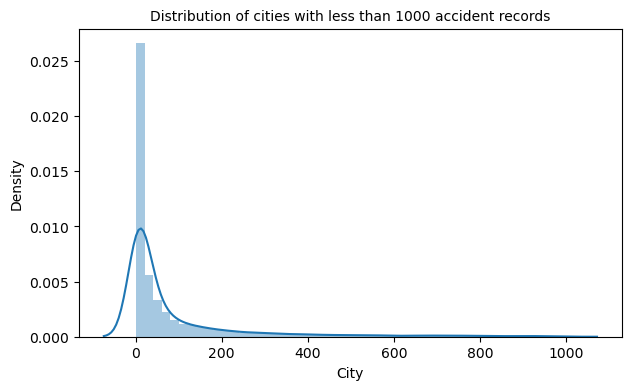

In [20]:
plt.figure(figsize=(7,4))
sns.distplot(min_acc)
plt.title("Distribution of cities with less than 1000 accident records",size=10,color="black");

- The plot above is left-skewed, this explains that for cities with accident records less than 1000 have most cases with range of 0 - 100 .
- We can check the count of cities with 0 and 1 cases . 

In [21]:
print(f'There are {len(min_acc[min_acc == 1])} cities where record cases = 1')
print(f'There are {len(min_acc[min_acc == 0])} cities where record cases = 0')

There are 1110 cities where record cases = 1
There are 0 cities where record cases = 0


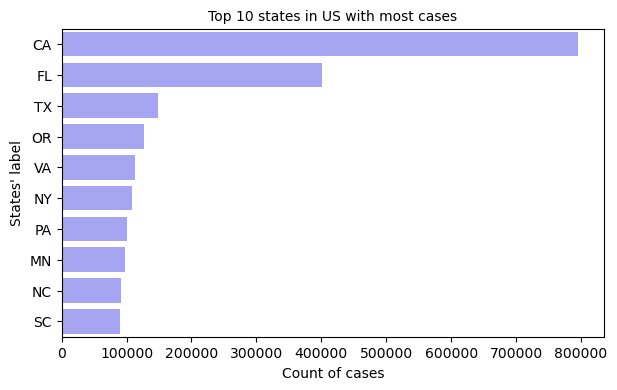

In [22]:
# checking for top 10 states with frequent accident cases 
plt.figure(figsize=(7,4))
sns.barplot(y=df1['State'].value_counts().head(10).index, x=df1['State'].value_counts().head(10),color="b",alpha=0.4)
plt.title("Top 10 states in US with most cases",size=10,color="black")
plt.ylabel("States' label")
plt.xlabel('Count of cases');

- CA as in California had most accidents of 795868 followed by FL(Florida)
- The top 2 states with highest accident counts can be found in the top 2 cities with highest counts.   

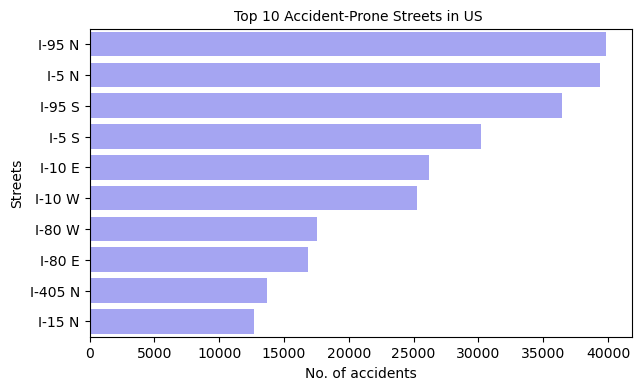

In [23]:
# Checking for streets that have highest record of accident cases 
plt.figure(figsize=(7,4))
sns.barplot(y=df1['Street'].value_counts().head(10).index, x=df1['Street'].value_counts().head(10),color="b",alpha=0.4)
plt.title("Top 10 Accident-Prone Streets in US ",size=10)
plt.ylabel('Streets')
plt.xlabel('No. of accidents');

- 'I-95 N' has the highest record of accidents. 
- I-95 North [passes through 15 states](https://en.wikipedia.org/wiki/Interstate_95#:~:text=With%20a%20length%20of%201%2C908,more%20than%20any%20other%20Interstate.) in the US, therefore there is a high possibility of frequent accident records on this path. 

Now, checking for time and date of accident records.

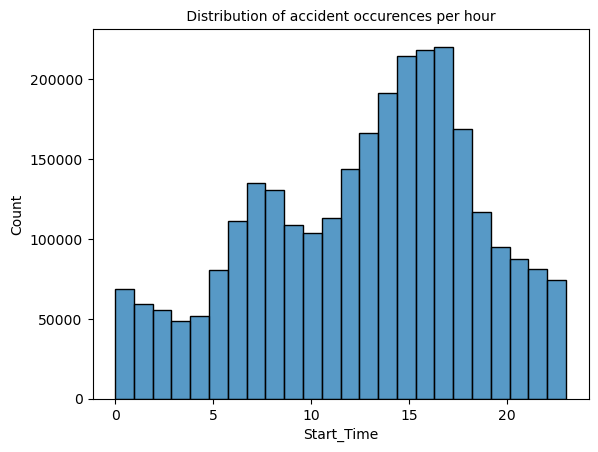

<Figure size 700x400 with 0 Axes>

In [24]:
sns.histplot(df1.Start_Time.dt.hour,bins=24)
plt.title(" Distribution of accident occurences per hour ",size=10)
plt.figure(figsize=(7,4));

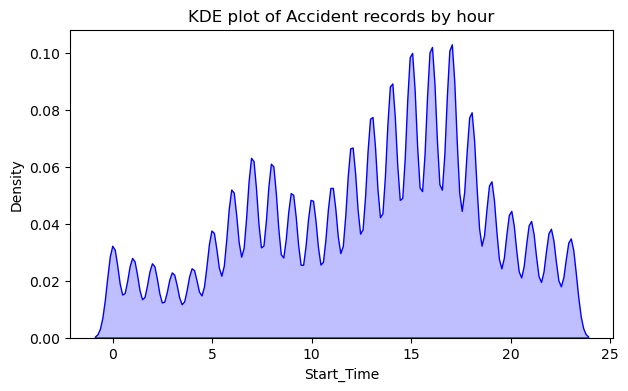

In [25]:
#Let's see this better using KDE plot 
plt.figure(figsize=(7,4))
sns.kdeplot(x=df1.Start_Time.dt.hour,data=df1,color='b',shade=True)
plt.title('KDE plot of Accident records by hour');

- Both plots above show two peaks(one higher than the other). 
- First peak (5am - 8am) can be situations associated with morning rush, people in a hurry to move to school and their places of work. 
- Second peak (12 pm - 18pm) are accident records as a result of fatigue from road users hence most of them are less attentive to the road (rush hour).

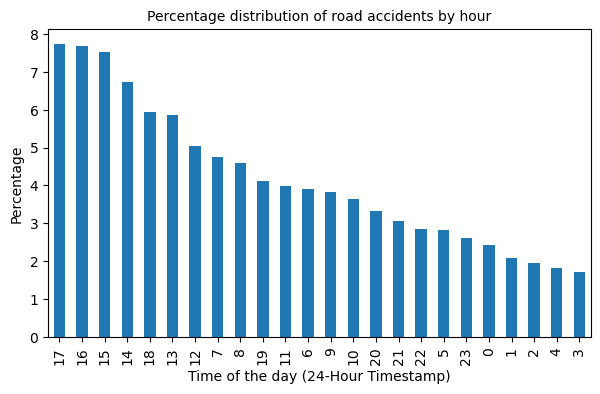

In [26]:
#showing the percentages of accidents by hour , in decreasing order
plt.figure(figsize=(7,4))
ax= df1.Start_Time.dt.hour.value_counts(normalize=True) * 100
ax.plot(kind="bar")
plt.title("Percentage distribution of road accidents by hour",size=10)
plt.xlabel("Time of the day (24-Hour Timestamp)")
plt.ylabel("Percentage");

- 15:00 - 17:00 seem to be hours with highest accident count. It could be termed 'The Deadly hours' .

Now checking for days with frequent accident records .

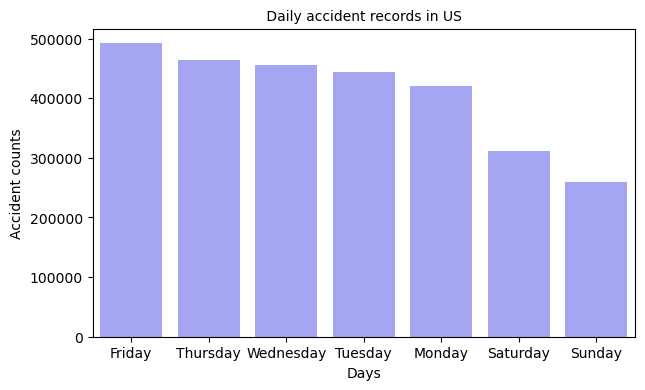

In [27]:
plt.figure(figsize=(7,4))
sns.barplot(y=df1["Start_Time"].dt.day_name().value_counts(), x=df1["Start_Time"].dt.day_name().value_counts().index,color="b",alpha=0.4)
plt.title(" Daily accident records in US ",size=10)
plt.xlabel('Days')
plt.ylabel('Accident counts');

- Friday has highest record of accidents while Sunday has the least. However this statement may be biased. 
- There are lesser accidents on weekends compared to weekdays . 
- Is the distribution of accidents by hour the same on the weekends as on weekdays?

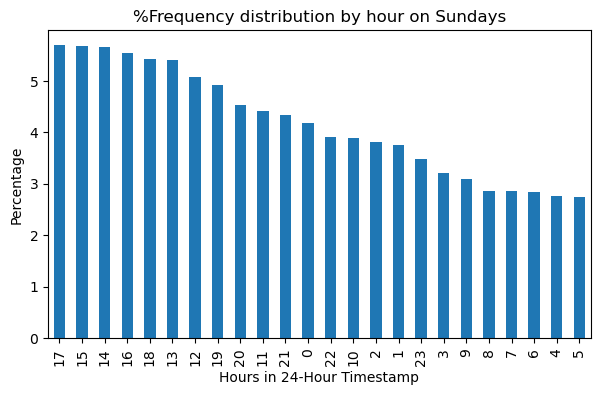

In [28]:
#checking for hourly record of accidents for Sunday being day with minimum record
sundays_start_time=df1.Start_Time[df1.Start_Time.dt.day_name() == 'Sunday']
plt.figure(figsize=(7,4))
(sundays_start_time.dt.hour.value_counts(normalize=True)*100).plot(kind="bar")
plt.title("%Frequency distribution by hour on Sundays")
plt.xlabel("Hours in 24-Hour Timestamp")
plt.ylabel("Percentage");

- On Sundays the peak occur between 14:00 - 17:00 , same as weekdays 
- Deadliest hour is still 17:00

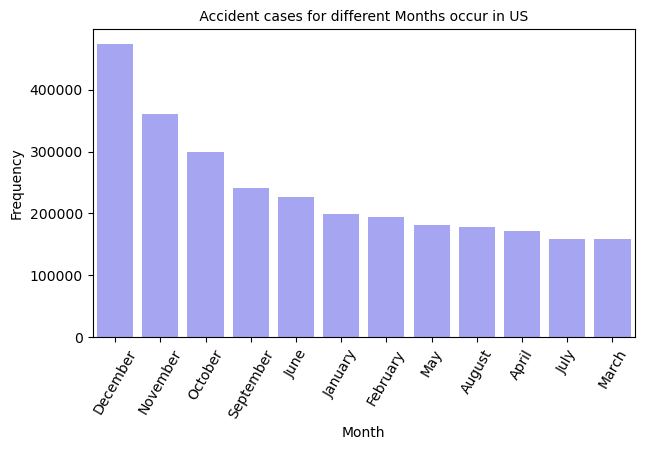

In [29]:
# Now checking for month with highest record of accidents 

plt.figure(figsize=(7,4))
sns.barplot(y=df.Start_Time.dt.month_name().value_counts(), x=df.Start_Time.dt.month_name().value_counts().index,color="b",alpha=0.4)
plt.title(" Accident cases for different Months occur in US ",size=10)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=60);

- December has highest records of accidents .
- There is an increase in number of accidents from September to December (This is probably because of the winter season). 
- Adverse weather conditions in winter lead to more collisions historically . 
- What's the weekly distribution of accidents in December ? This can help us generate more insights.

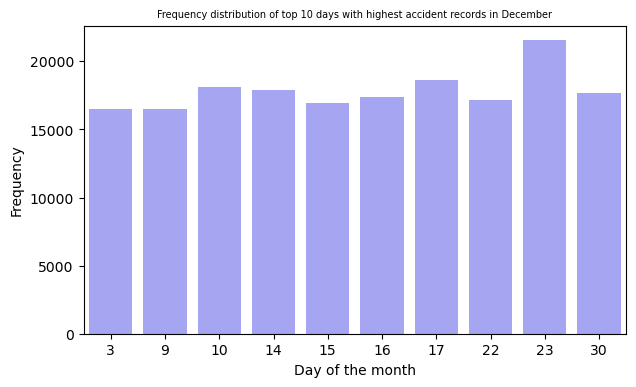

In [30]:
accidents_on_dec= df1.Start_Time[df1.Start_Time.dt.month_name()=="December"]
plt.figure(figsize=(7,4))
sns.barplot(y=accidents_on_dec.dt.day.value_counts().head(10),x=accidents_on_dec.dt.day.value_counts().head(10).index, color="b",alpha=0.4)
plt.title("Frequency distribution of top 10 days with highest accident records in December",size=7)
plt.xlabel("Day of the month");
plt.ylabel("Frequency");

- 23 of December shows highest record for accident over the years . It is normal that it is towards month ending and a close date for christmas. 
- 23rd of December is [National Roots day](https://nationaldaycalendar.com/national-roots-day-december-23/#:~:text=National%20Roots%20Day%20on%20December,to%20be%20the%20family%20historian.) in USA, which is an ideal time for family members to travel down for family history and lineage bonding. However this might not be a major factor as to hogh accidnet rate on the 23rds. 

In [31]:
''''fig, axs = plt.subplots(ncols=1, figsize=(7, 4))

for ax, col in zip(axs, ['age', 'fare']):
    sns.barplot(
        x='sex',
        y=col,
        hue="class",
        data=titanic,
        edgecolor=".3",
        linewidth=0.5,
        ci=None,
        ax=ax
    )
    ax.set_title('mean ' + col)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.1f')
plt.tight_layout()
plt.show()'''

'\'fig, axs = plt.subplots(ncols=1, figsize=(7, 4))\n\nfor ax, col in zip(axs, [\'age\', \'fare\']):\n    sns.barplot(\n        x=\'sex\',\n        y=col,\n        hue="class",\n        data=titanic,\n        edgecolor=".3",\n        linewidth=0.5,\n        ci=None,\n        ax=ax\n    )\n    ax.set_title(\'mean \' + col)\n    ax.margins(y=0.1) # make room for the labels\n    for bars in ax.containers:\n        ax.bar_label(bars, fmt=\'%.1f\')\nplt.tight_layout()\nplt.show()'

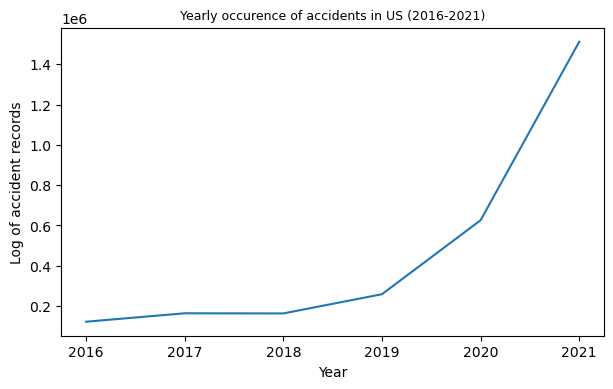

In [32]:
# Now checking for yearly accident records 

plt.figure(figsize=(7,4))
sns.lineplot(data=df.Start_Time.dt.year.value_counts())
plt.title(" Yearly occurence of accidents in US (2016-2021) ",size=9)
plt.xlabel('Year')
plt.ylabel('Log of accident records');

- There is an exponential increase in accident records.
- Maximum count of accidents was recorded in the year 2021,a sharp increase from 2020. 
- Problem was a persistence of risky driving behaviors during the pandemic, such as speeding and less frequent use of seat belts, as people began to venture out more in 2021 for out-of-state and other road trips, [analysts said](https://www.usatoday.com/story/news/nation/2022/05/17/nhtsa-43000-killed-car-accidents-2021/9813792002/) .
- [Speeding](https://www.ddlawtampa.com/resources/car-accident-statistics-you-need-to-know-in-2021/#:~:text=Speeding%20is%20the%20number%20one,vehicle%20accidents%20resulted%20from%20speeding.) was said to be one of the core causes of road accidents in 2021. 
- Could 2016 have had lowest accident records ?

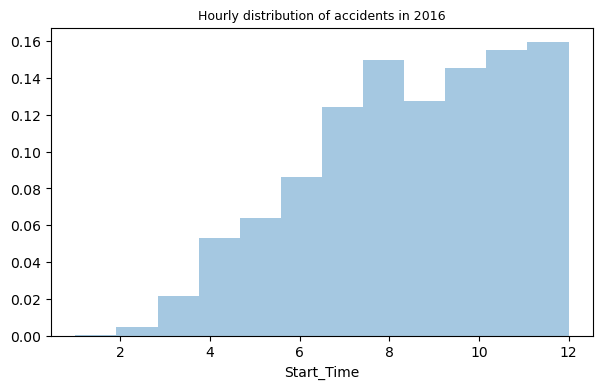

In [33]:
# checking for frequency distribution of accidents in 2016

df_2016 = df1[df1.Start_Time.dt.year == 2016]
plt.figure(figsize=(7,4))
sns.distplot(df_2016.Start_Time.dt.month,bins=12, kde=False, norm_hist=True)
plt.title(" Hourly distribution of accidents in 2016 ",size=9);

- There is possibility that enough data wasn't collected for 2016 or missing data , hence the left-skewed distribution

#### Let's check the  yearly trend of these accidents

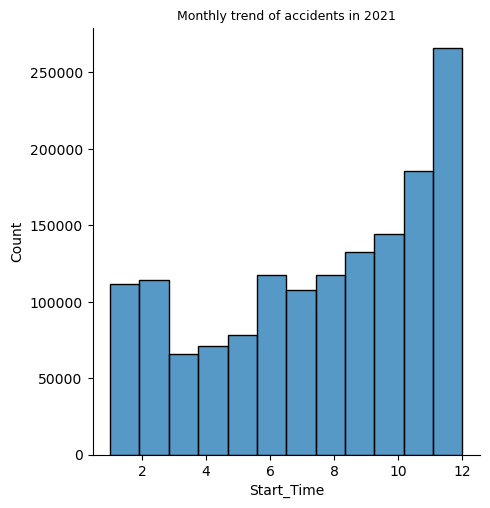

<Figure size 500x400 with 0 Axes>

In [34]:
df_2021 = df1[df1.Start_Time.dt.year == 2021]
sns.displot(df_2021.Start_Time.dt.month,bins=12, kde=False)
plt.title(" Monthly trend of accidents in 2021 ",size=9);
#print("Total accidents in 2021",df_2021.Start_Time.dt.month.value_counts().sum())
plt.figure(figsize=(5,4));

<Figure size 500x300 with 0 Axes>

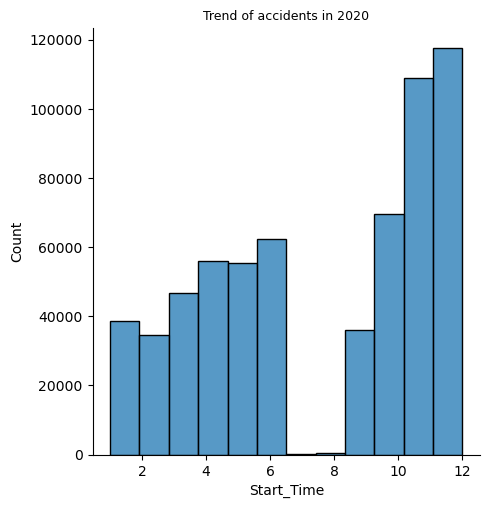

In [35]:
df_2020 = df1[df1.Start_Time.dt.year == 2020]
plt.figure(figsize=(5,3));
sns.displot(df_2020.Start_Time.dt.month,bins=12, kde=False);
plt.title(" Trend of accidents in 2020 ",size=9);

<Figure size 700x400 with 0 Axes>

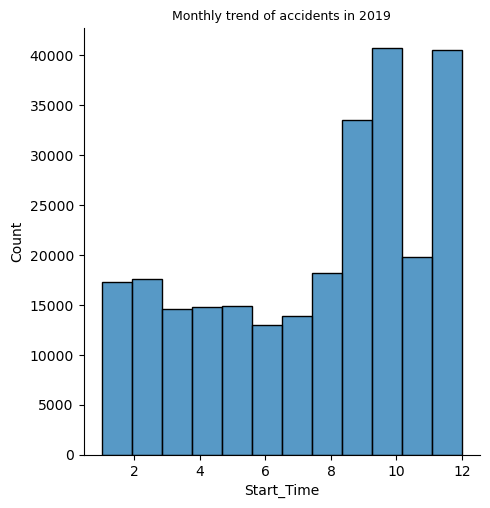

In [36]:
df_2019 = df1[df1.Start_Time.dt.year == 2019]
plt.figure(figsize=(7,4));
sns.displot(df_2019.Start_Time.dt.month,bins=12, kde=False);
plt.title(" Monthly trend of accidents in 2019 ",size=9);

<Figure size 700x400 with 0 Axes>

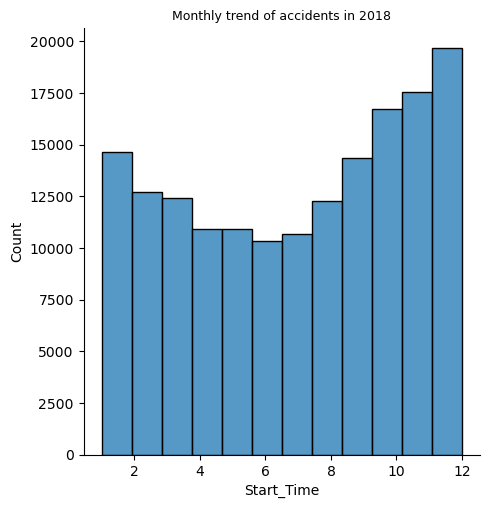

In [37]:
df_2018 = df1[df1.Start_Time.dt.year == 2018]
plt.figure(figsize=(7,4));
sns.displot(df_2018.Start_Time.dt.month,bins=12, kde=False);
plt.title(" Monthly trend of accidents in 2018 ",size=9);

<Figure size 700x400 with 0 Axes>

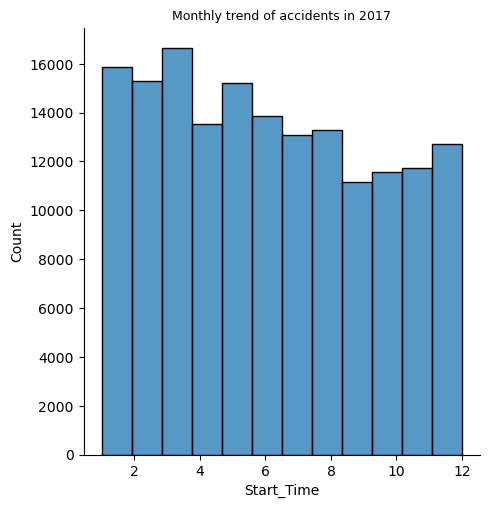

In [42]:
df_2017 = df1[df1.Start_Time.dt.year == 2017]
plt.figure(figsize=(7,4));
sns.displot(df_2017.Start_Time.dt.month,bins=12, kde=False);
plt.title(" Monthly trend of accidents in 2017 ",size=9);

From the yearly trend by month from the charts above, we can see that:
- Years of 2016 and 2020 contains missing data.
- Records of  some months in 2020 are missing. 
- For all the years, December had the highest records except 2017

#### Let's check the percentage overturn of accidents

In [43]:
pct =df1.Start_Time.dt.year.value_counts(ascending=True)
pct.sort_index().pct_change()*100

2016           NaN
2017     34.332590
2018     -0.452665
2019     58.488381
2020    142.006071
2021    141.545288
Name: Start_Time, dtype: float64

- We can see that the percentage change over the years was highest in 2019 - 2020 and 2020 - 2021
- There was likely no change / increase in accident records in 2017 - 2018

#### What is the frequency dist of severity of accidents

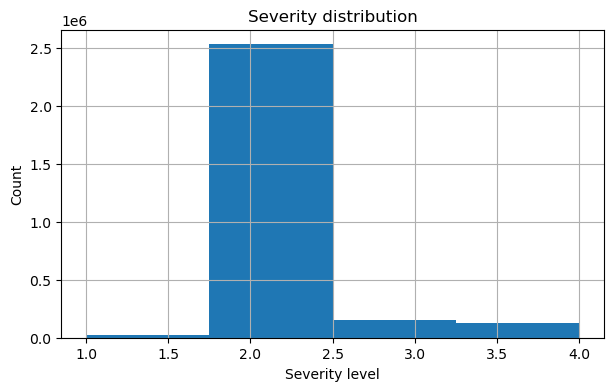

In [45]:
plt.figure(figsize=(7,4));
df1.Severity.hist(bins=4)
plt.title("Severity distribution")
plt.xlabel("Severity level")
plt.ylabel("Count");

The degree of severity represents the type of accident. It usually is listed as:
- 1- Not visible but complaints of pain (least affects traffic).
- 2- Non-incapicating / Minor injuries
- 3- Incapacitating / Major injuries
- 4- Fatal (affects traffic the most).

- Density of severity of accidents is '2'


In [46]:
sev = df1.groupby("Severity")["Temperature(F)","Wind_Chill(F)","Humidity(%)","Visibility(mi)"].mean()
sev

,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi)
Severity,,,,
1,71.257955,70.929767,49.972549,9.530788
2,61.868632,60.014508,64.364753,9.079442
3,61.920769,54.569440,64.150354,9.355606
4,58.275355,51.276253,67.544336,9.095082


- Columns were grouped by severity level. 
- At severity of "2" , there is a significant change in the values of Temperature, Wind_Chill, Humidity from severity of "1"
- Visibility doesn't seem to be a factor in accidents.

#### Are there any effect of temperature on accidents ?

In [47]:
temp_acc=df["Temperature(F)"].value_counts()
temp_acc.sort_values().tail(10)

59.0    56025
66.0    56336
70.0    57760
64.0    57937
63.0    58259
68.0    58557
72.0    59681
75.0    60534
77.0    63575
73.0    64505
Name: Temperature(F), dtype: int64

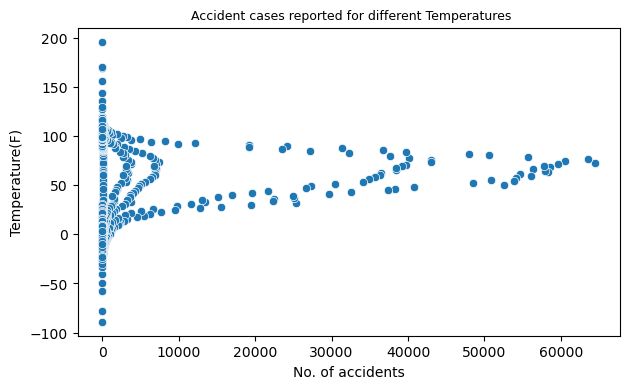

In [48]:
plt.figure(figsize=(7,4))
plt.title(" Accident cases reported for different Temperatures",size=9)
plt.xlabel('No. of accidents')
plt.ylabel('Temperature(F)')
sns.scatterplot(y=temp_acc.index, x=temp_acc);

- A high count of accident occured between 77F and 73F , both are room temperatures. 
- There is no correlation between temperature and accidents. 

#### Let's check if humidity could be a factor

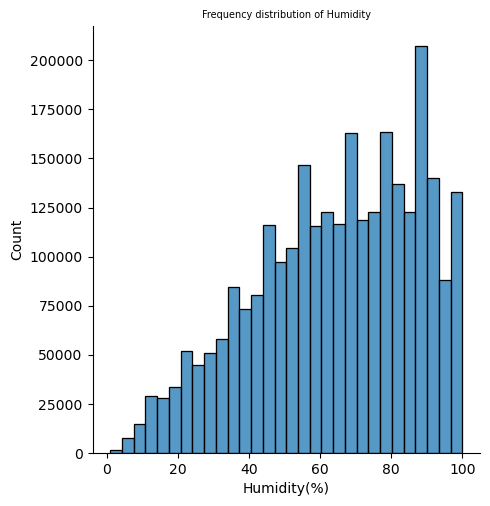

In [49]:
print(sns.displot(df1['Humidity(%)'],bins=30))
plt.title("Frequency distribution of Humidity", size=7);

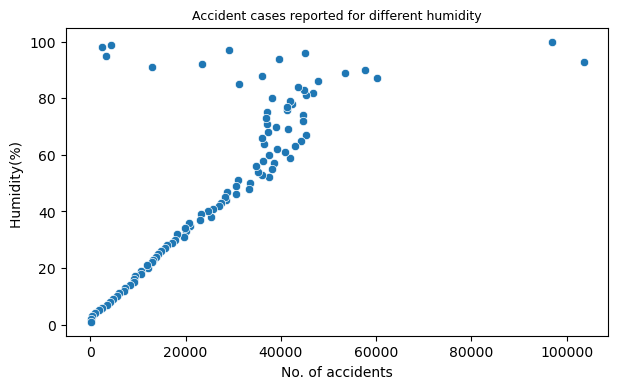

In [50]:
plt.figure(figsize=(7,4))
plt.title(" Accident cases reported for different humidity ",size=9)
plt.xlabel('No. of accidents')
plt.ylabel('Humidity(%) ')
sns.scatterplot(y=df["Humidity(%)"].value_counts().index, x=df["Humidity(%)"].value_counts());

- There is a positive relationship between Humidity and accident counts.
- There are cases of outliers in this situation. 

#### What was the weather condition in those accident records ?

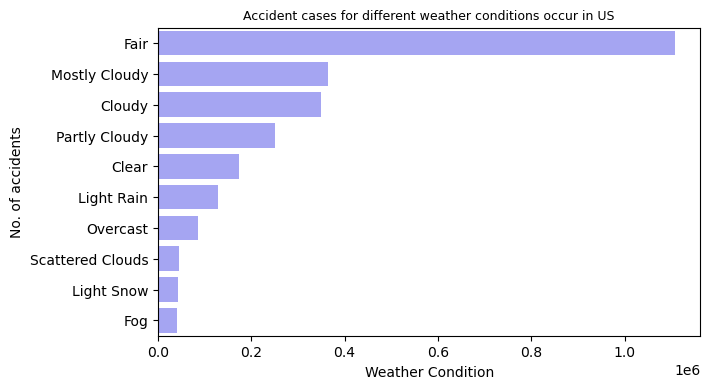

In [51]:
plt.figure(figsize=(7,4))
sns.barplot(y=df1["Weather_Condition"].value_counts().head(10).index, x=df1["Weather_Condition"].value_counts().head(10),color="b",alpha=0.4)
plt.title(" Accident cases for different weather conditions occur in US ",size=9);
plt.xlabel('Weather Condition');
plt.ylabel('No. of accidents');

#### Inter - Quartile Range

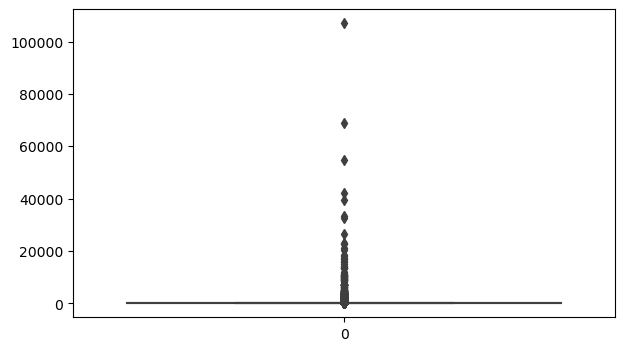

In [52]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df1["City"].value_counts())
plt.ylim();

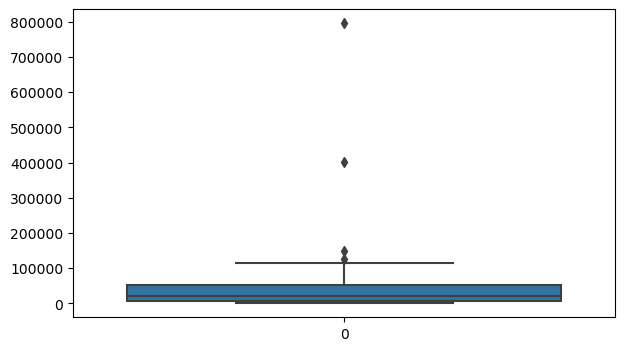

In [53]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df1["State"].value_counts())
plt.ylim();

#### Removing outliers

In [54]:
max_threshold = data=df1["State"].value_counts().quantile(0.95)
min_threshold = data=df1["State"].value_counts().quantile(0.01)
X_input_removed_outliers = df1["State"].value_counts()[(df1["State"].value_counts()<max_threshold)&(df1["State"].value_counts()>min_threshold)]

(-5933.8, 132639.8)

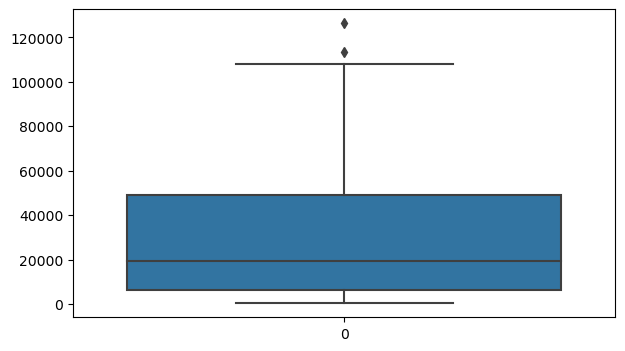

In [55]:
plt.figure(figsize=(7,4))
sns.boxplot(data=X_input_removed_outliers)
plt.ylim()

In [56]:
max_threshold = data=df1["City"].value_counts().quantile(0.95)
min_threshold = data=df1["City"].value_counts().quantile(0.01)
X_input_removed_outliers = df1["City"].value_counts()[(df1["City"].value_counts()<max_threshold)&(df1["City"].value_counts()>min_threshold)]

(-40.7, 898.7)

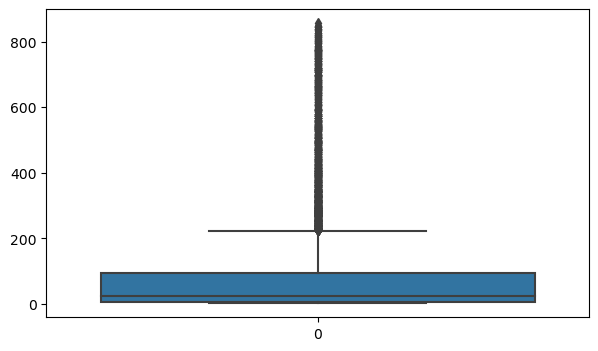

In [57]:
plt.figure(figsize=(7,4))
sns.boxplot(data=X_input_removed_outliers)
plt.ylim()

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

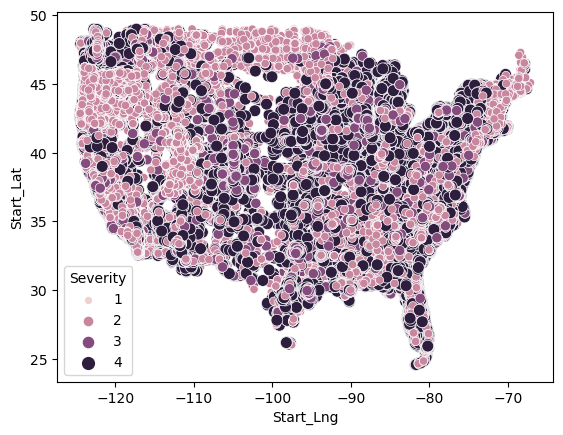

In [58]:
sns.scatterplot(x=df1.Start_Lng,y=df1.Start_Lat,data=df1,size=df1.Severity, hue=df1.Severity)

In [59]:
sample_df = df1.sample(frac=0.25)
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
from folium.plugins import HeatMap
import folium

In [ ]:
map=folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# Summary and Conclusion